In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [3]:
f_path = "processed_files"
word_df = pd.read_csv(os.path.join(f_path, 'merged_withoutstring.csv')).loc[:,["Word"]]
merged_df = pd.read_csv(os.path.join(f_path, 'merged_withoutstring.csv'))
# merged_df = merged_df.loc[:, ~merged_df.columns.isin(['Word', 'Word type', 'pos_new'])]
merged_df = merged_df.set_index('Word', drop=True)


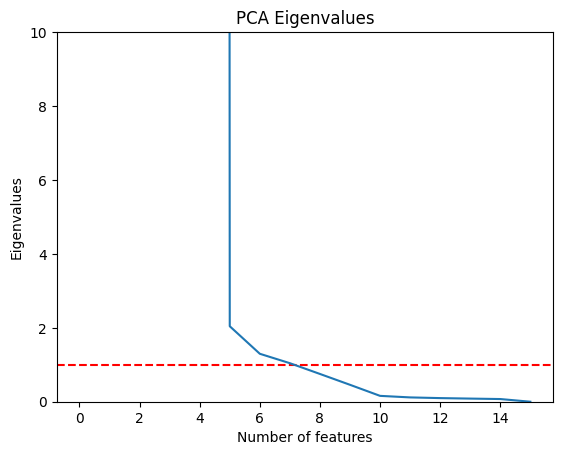

In [4]:
pca = PCA(n_components=len(merged_df.columns))
pca.fit(merged_df)
# print(pca.explained_variance_)
plt.ylabel('Eigenvalues')
plt.xlabel('Number of features')
plt.title('PCA Eigenvalues')
plt.ylim(0, 10)
plt.axhline(y=1, color = 'r', linestyle='--')
plt.plot(pca.explained_variance_)
plt.show()

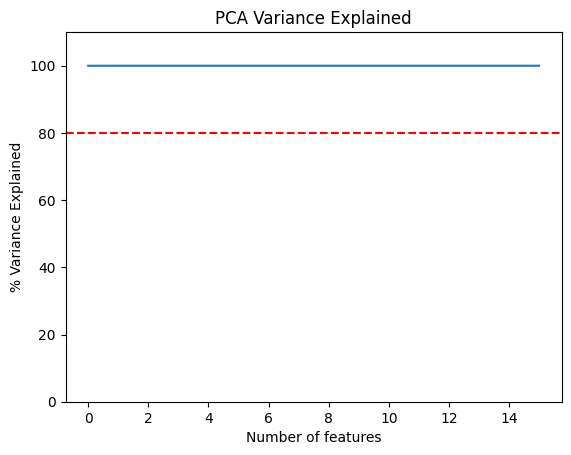

[9.99894145e-01 9.44724365e-05 8.28248111e-06 1.96381962e-06
 1.13148831e-06 1.70610551e-09 1.08382834e-09 8.70791190e-10
 6.27766722e-10 3.82489952e-10 1.32470171e-10 9.74704440e-11
 8.18368040e-11 7.07741629e-11 6.06086466e-11 2.17954901e-42]


In [5]:
var = np.cumsum(pca.explained_variance_ratio_*100)
plt.ylabel('% Variance Explained')
plt.xlabel('Number of features')
plt.title('PCA Variance Explained')
plt.ylim(0, 110)
plt.axhline(y=80, color='r', linestyle='--')
plt.plot(var)
plt.show()
print(pca.explained_variance_ratio_)

Combining those graphs, we can find that one feature can explain more than 99.99% of the variances.

The amount of variance explained: [1.19691371e+09]
Percentage of variance explained: [0.99989414]


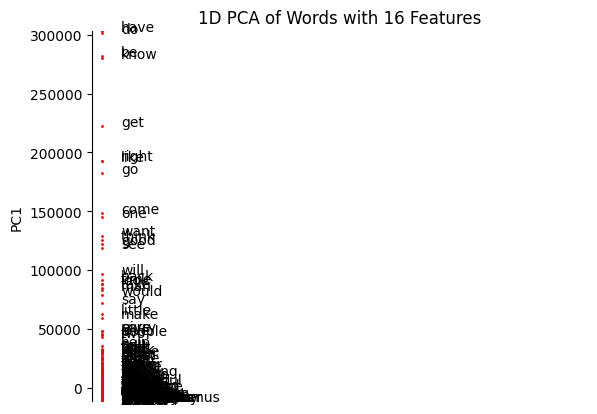

In [11]:
new_pca = PCA(n_components=1)
new_df = new_pca.fit_transform(merged_df)
print(f"The amount of variance explained: {new_pca.explained_variance_}")
print(f"Percentage of variance explained: {new_pca.explained_variance_ratio_}")
fig, ax = plt.subplots()
ax.xaxis.set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_ylim(min(new_df), max(new_df))
ax.scatter([0]*len(new_df), new_df, marker='o', s=1, c='r')
ax.set_xlim(-0.1,5)
ax.set_ylabel('PC1')
for i in range(len(new_df)):
    ax.annotate(word_df.at[i, 'Word'], xy=(0.20, new_df[i]))
plt.title('1D PCA of Words with 16 Features')
plt.show()

In [37]:
# only for dataset update
word_df['PC1'] = new_df
word_df.to_csv(os.path.join(f_path, "PC1.csv"), 
              index = None,
              header=True)